# A/B Test Ad Campaign Python

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
#load the dataset
df=pd.read_csv('./testdata.csv')

In [ ]:
#show the dataframe head
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


#  Set up the hypothesis testing steps


In [ ]:
#find insights in our data
#using .value_count method 

# For the group columns
df['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [ ]:
#find insights in our data

# For the action columns
df['fb_campaign_id'].value_counts()

144636    6
144562    6
144674    6
144536    6
144611    6
         ..
116031    1
144704    1
116033    1
116039    1
116595    1
Name: fb_campaign_id, Length: 691, dtype: int64

**Experiment group :**
the group that is involved in the new experiment . i.e the group that received the new ad .

**Control group :**
the 2nd group that didn't receive the new ad

**Click-through rate (CTR) :**
the number of clicks advertisers receive on their ads per number of impressions.


# Hypothesis Testing steps:

## 1) Specify the Null Hypothesis.
### There is no difference between certain characteristics of a population
### Here the null hypothesis is that the new ad did not generate more clicks than the old one - the new ad CTR is less than the old one


## 2) Specify the Alternative Hypothesis.
### What we want to prove to be true
### in this case the alternative hypothesis is that the new ad generates more click than the old one


## 3) Set the Significance Level (a)
### probability of rejecting the null hypothesis when it's true

## 4) Calculate the  Corresponding P-Value.
### the P-Value equals to 0.5

## 5) Drawing a Conclusion





```
# This is formatted as code
```

##  Compute the difference in the click-through rate 

In [ ]:
# Get dataframe with all observations from control group 

control_df = df.query('xyz_campaign_id=="1178"')

# Compute CTR for control group 
control_ctr =control_df.query('fb_campaign_id=="144636"').index.nunique()/control_df.index.nunique()

#Display the CTR For the control group
control_ctr

0.0096

In [ ]:
# Get dataframe with all observations from control group 
experiment_df = df.query('xyz_camapaign_id==""')

# Compute CTR for control group 
experiment_ctr =experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()

#Display the CTR For the control group
experiment_ctr

0.16586921850079744

In [ ]:
#Compute the difference in the CTR 
diff=experiment_ctr-control_ctr
#display the difference 
diff

-0.027627583204959477

When the difference is negative = means that the new version of the ad has performed less than the old

# create sample distribution using bootsrapping

In [ ]:
#bootsrapping

# empty list for the for loop
differences = []

# sample size - we want the same as the dataset
size=df.shape[0]

# for loop - to boot strap the sample 10000 times
for I in range(10000):
    # define size of the sample and if we replace
    sample=df.sample(size,replace=True)
    control_df=sample.query('group=="control"')
    experiment_df=sample.query('group=="experiment"')
    control_ctr=control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
    experiment_ctr=experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()
    differences.append(experiment_ctr-control_ctr)

# Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([  22.,  140.,  664., 1721., 2755., 2632., 1465.,  503.,   89.,
           9.]),
 array([-0.06209659, -0.05504038, -0.04798418, -0.04092797, -0.03387176,
        -0.02681555, -0.01975934, -0.01270314, -0.00564693,  0.00140928,
         0.00846549]),
 <BarContainer object of 10 artists>)

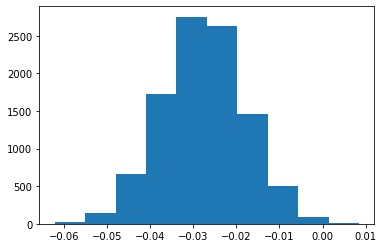

In [ ]:
# Plot the sampling distribution 

# the list differences contains all the samples values generated from the bootstrapping method
# transform the list into an array using numpy.array()

differences=np.array(differences)
plt.hist(differences)

As expected we have a normal distributed plot

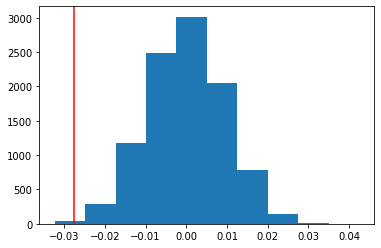

In [ ]:
#simulate the distribution under the null hypothesis 

null_hypothesis=np.random.normal(0,differences.std(),differences.size)

#plot the null distribution 
plt.hist(null_hypothesis)
plt.axvline(diff,c='red')

###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [ ]:
# Compute the  P-value 
(null_hypothesis>diff).mean()

0.9986

## Conclusion

### Should we go for the new ad or keep the old one?

### We should keep the old one!

### Why: 
#### -- The P-Value is higher than what we expected -- 0.99 instead of 0.05. 
#### -- the null hypothesis is now confirmed

